In [1]:
import sys
import os
# Calculate the absolute path to the project root (one level up) to make src available
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import zipfile

import pandas as pd
import numpy as np
import pathlib
import xarray as xr
import netCDF4 as nc
import dask
import json
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import src.utils.features_monthly as ftmon
##

In [5]:

folder_path = '../monthly_data'
combined = ftmon.monthly_data_prep(folder_path=folder_path, extension='.nc')

/Users/philipp/Documents/02_Master_Uni/Uni_Tübingen/Semester_1/06 Data Literacy/02 Project/projectP/src/utils/features_monthly.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flattened = df.groupby(['valid_time', 'latitude', 'longitude']).sum().reset_index()
/Users/philipp/Documents/02_Master_Uni/Uni_Tübingen/Semester_1/06 Data Literacy/02 Project/projectP/src/utils/features_monthly.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flattened = df.groupby(['valid_time', 'latitude', 'longitude']).sum().reset_index()


- siconc = sea ice concentration
- rsn = snow density
- sst = sea surface temperature
- sd = snow depth
- t2m = 2m temperature
- tp = total percipitation
- avg_smr = average snow melt rate

In [2]:
"""
# open csv files
grouped = pd.read_csv('../monthly_data/grouped_data.csv')
grouped_anomaly = pd.read_csv('../monthly_data/grouped_anomaly.csv')
reference_period_df = pd.read_csv('../monthly_data/reference_period.csv')
"""

In [6]:
grouped = ftmon.aggregate_data(combined)

/Users/philipp/Documents/02_Master_Uni/Uni_Tübingen/Semester_1/06 Data Literacy/02 Project/projectP/src/utils/features_monthly.py:46: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  grouped = grouped[(grouped['valid_time'] >= pd.Timestamp('1996-01-01')) & (grouped['valid_time'] <= pd.Timestamp('2017-12-31'))].reset_index(drop=True)


## Calculate statistics for reference period 1961-1990

In [3]:
files_rp = '../monthly_data/reference_period'
reference_period_df = ftmon.monthly_data_prep(folder_path=files_rp, extension= '.nc')

/Users/philipp/Documents/02_Master_Uni/Uni_Tübingen/Semester_1/06 Data Literacy/02 Project/projectP/src/utils/features_monthly.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flattened = df.groupby(['valid_time', 'latitude', 'longitude']).sum().reset_index()
/Users/philipp/Documents/02_Master_Uni/Uni_Tübingen/Semester_1/06 Data Literacy/02 Project/projectP/src/utils/features_monthly.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flattened = df.groupby(['valid_time', 'latitude', 'longitude']).sum().reset_index()


## Center Data around Reference period

In [21]:
# grouped_anomaly = ftmon.calculate_anomalies(grouped, reference_period_df)
grouped_anomaly = ftmon.calculate_anomalies(grouped, reference_period_df)

In [6]:
"""
# save both dfs to csv
# grouped.to_csv('../monthly_data/grouped_data.csv')
# grouped_anomaly.to_csv('../monthly_data/grouped_anomaly.csv')

#save to csv
reference_period_df.to_csv('../monthly_data/reference_period.csv')
"""

In [5]:
# add year and month columns to grouped and reference_period_df from valid_time
grouped['valid_time'] = pd.to_datetime(grouped['valid_time'])
grouped['year'] = grouped['valid_time'].dt.year
grouped['month'] = grouped['valid_time'].dt.month

reference_period_df['valid_time'] = pd.to_datetime(reference_period_df['valid_time'])
reference_period_df['year'] = reference_period_df['valid_time'].dt.year
reference_period_df['month'] = reference_period_df['valid_time'].dt.month

In [13]:
#monthly_anomaly_df = ftmon.calculate_anomalies_monthly(grouped, reference_period_df)
monthly_anomaly_df = ftmon.calculate_anomalies_monthly(grouped, reference_period_df)

## Monthly Plots

/var/folders/pf/pkxhbds54clgt4d3jrz5l8kw0000gn/T/ipykernel_70669/2652703881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_monthly = grouped_anomaly.groupby(['year', 'month']).agg('mean').reset_index()


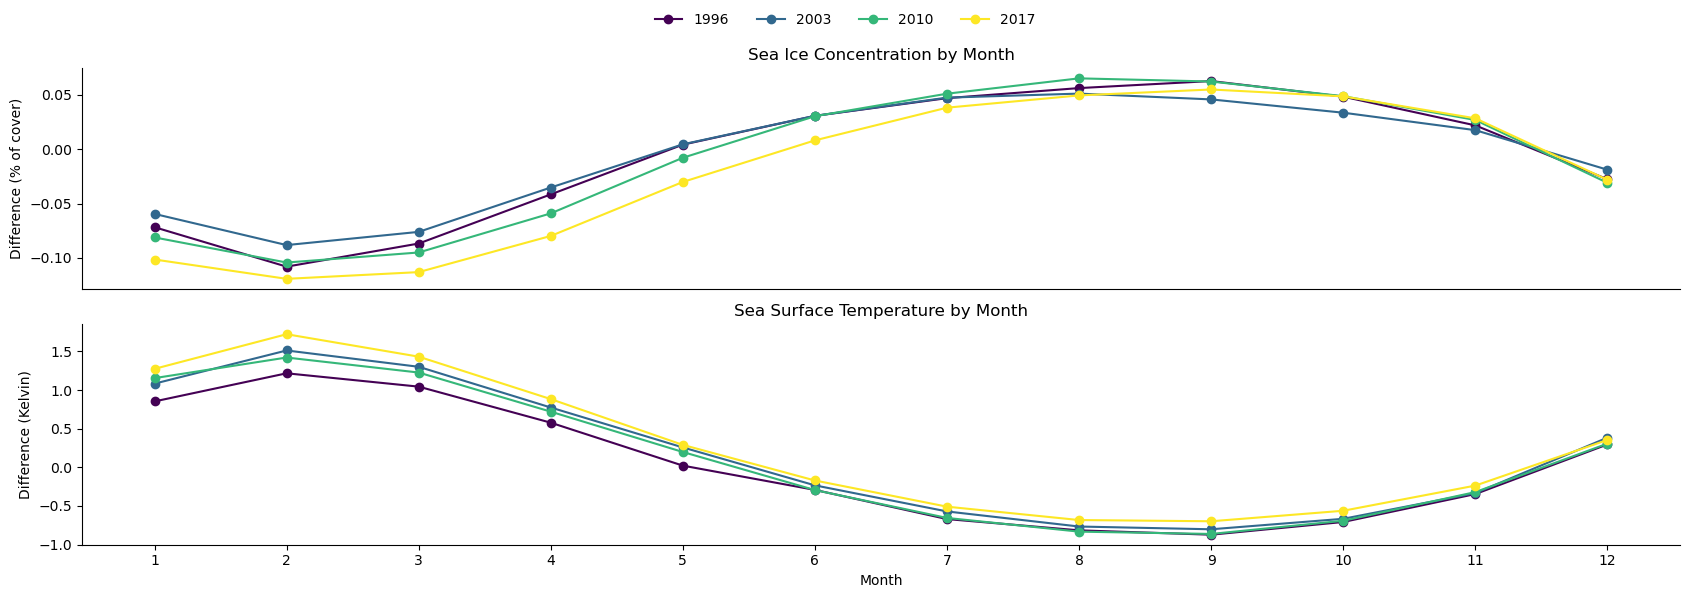

In [72]:
means_monthly = grouped_anomaly.groupby(['year', 'month']).agg('mean').reset_index()
means_monthly = means_monthly.drop(columns=['Unnamed: 0'])
# Only keep columns that are not metadata:
columns = [col for col in means_monthly.columns if col not in ['year', 'month', 'latitude', 'longitude']]

titles = {
    'siconc': 'Sea Ice Concentration', 
    'rsn': 'Snow Density', 
    'sst': 'Sea Surface Temperature', 
    'sd': 'Snow Depth', 
    't2m': '2m Temperature', 
    'tp': 'Total Precipitation', 
    'avg_smr': 'Average Snowmelt Rate'
}

ftmon.plot_two_variables_stacked(means_monthly, var1='siconc', var2='sst', titles=titles)


### Additional Plots

/var/folders/pf/pkxhbds54clgt4d3jrz5l8kw0000gn/T/ipykernel_70669/4133912094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_monthly = grouped_anomaly.groupby(['year', 'month']).agg('mean').reset_index()


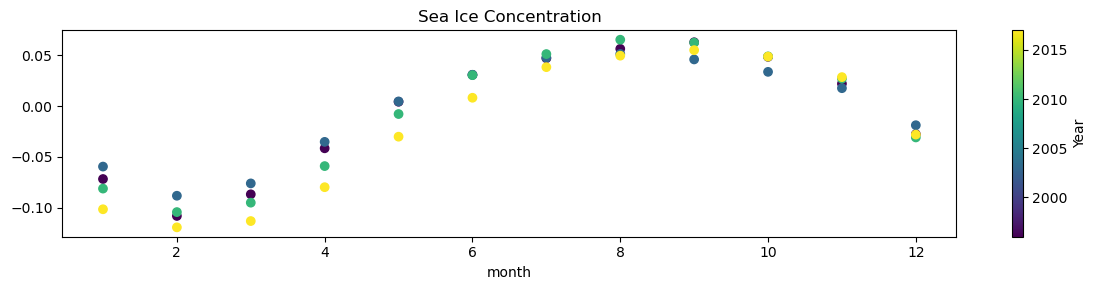

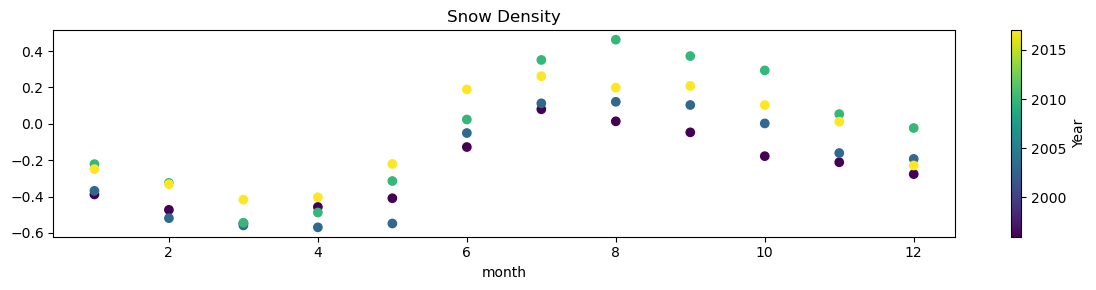

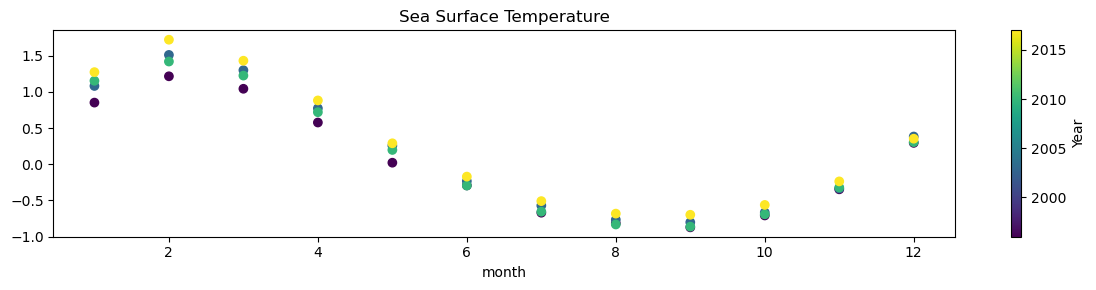

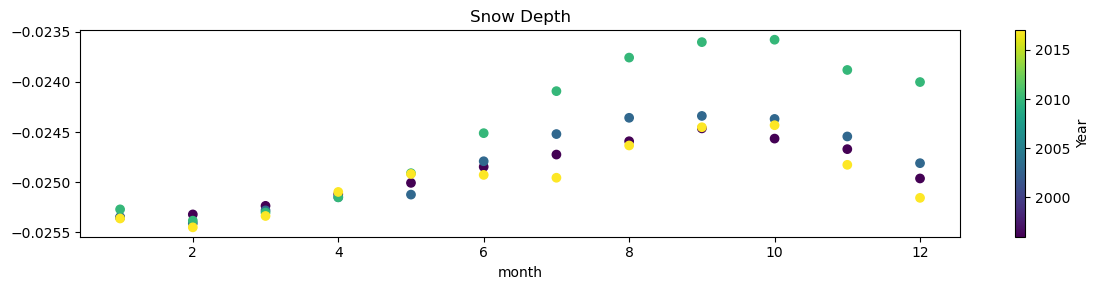

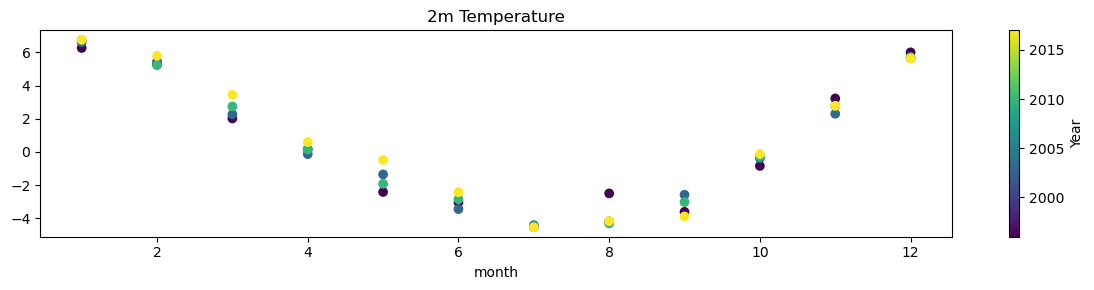

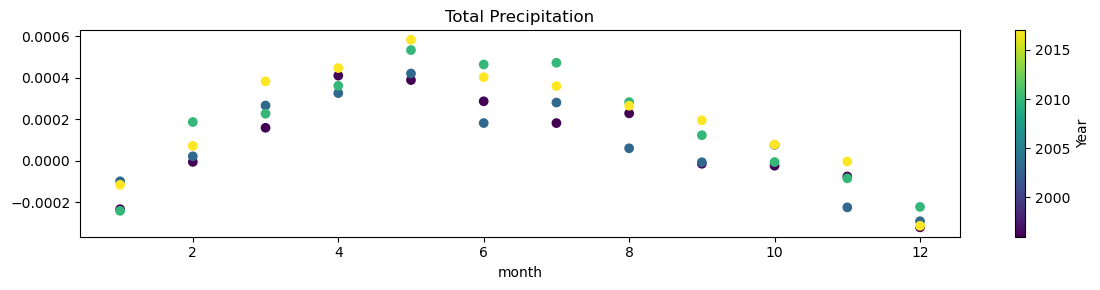

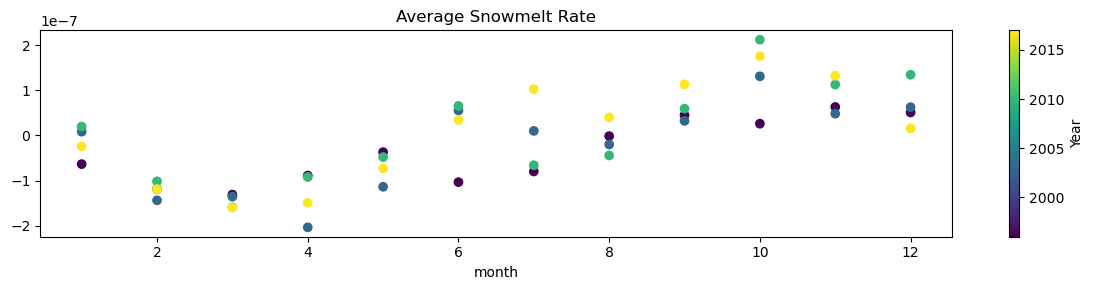

In [23]:
means_monthly = grouped_anomaly.groupby(['year', 'month']).agg('mean').reset_index()
means_monthly = means_monthly.drop(columns=['Unnamed: 0'])
# columns = means_monthly.columns[4:]  # only select the columns with the actual data
columns = [col for col in means_monthly.columns if not col in ['year', 'month', 'latitude', 'longitude']]

titles = {'siconc': 'Sea Ice Concentration', 'rsn': 'Snow Density', 'sst': 'Sea Surface Temperature', 'sd': 'Snow Depth', 't2m': '2m Temperature', 'tp': 'Total Precipitation', 'avg_smr': 'Average Snowmelt Rate'}

ftmon.plot_monthly(means_monthly, columns, titles, 1)

In [297]:
# run a regression on the monthly data fro 1996-2017
ftmon.run_temperature_regression(means_monthly, columns)

                            OLS Regression Results                            
Dep. Variable:                 siconc   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          7.84e-153
Time:                        21:13:10   Log-Likelihood:                -13.195
No. Observations:                 264   AIC:                             34.39
Df Residuals:                     260   BIC:                             48.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0467      4.932      0.618      0.5

on average (against base period):
- sea ice concentration is 0.2594 lower
- snow density is 0.4032 higher
- sea surface temperature is 0.2911 higher
- snow density is marginally lower
- 2m temperature increased by 0.0713
- total percipitation increased by 0.4580
- snow melt rate increased by 0.4122 

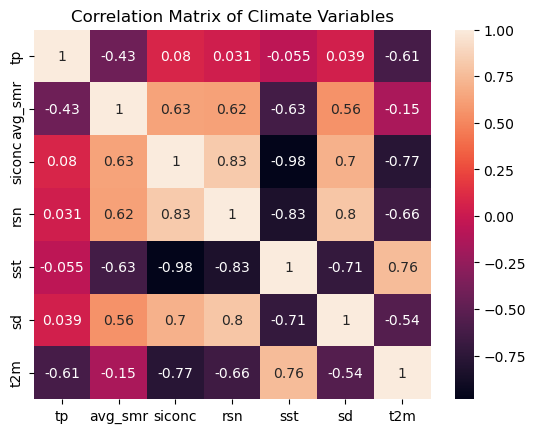

In [228]:
# calculate correlations between variables and plot covariance matrix

correlation_matrix = grouped_anomaly[columns].corr()

# save as xlsx
correlation_matrix.to_excel("correlation_matrix.xlsx")

sns.heatmap(correlation_matrix, annot=True)
plt.title(f'Correlation Matrix of Climate Variables')
plt.show()


- sst shows strong (negative) correlations with all variables except precipitation
- t2m shows strong (negative) correlations with all but snowmelt rate (????) Thats weird
- tp only (negatively) correlates with t2m and snowmelt rate
- sst and siconc almost the same (-0.98 corr) --> redundant
- could also argue that rsn is not needed, also correaltes really strong (-0.83) with sst
    - same for rsn and siconc
        - might (for simplicity) even be enough to just use sst?


## Calculate statistics

In [239]:
grouped_anomaly = grouped_anomaly.drop(columns=['latitude', 'longitude', 'valid_time'])

In [ ]:
results_monthly_df = ftmon.monthly_stats(grouped_anomaly, columns)

In [307]:
results_yearly_df = ftmon.monthly_stats_each_year(grouped_anomaly, columns)

In [314]:
ftmon.anomaly_detection(grouped_anomaly, columns,2)

Number of anomalies: 25


In [261]:
rolling_mean_df = ftmon.rolling_mean(grouped_anomaly, columns)

In [317]:
data_descriptives = ftmon.describe_data(grouped_anomaly, columns)

In [269]:
interquartile_range = ftmon.interquartile_range(grouped_anomaly, columns)

In [ ]:
percentile_analysis = ftmon.percentile_analysis(grouped_anomaly, columns)

## Yearly Plots


In [13]:

grouped_anomaly['valid_time'] = pd.to_datetime(grouped_anomaly['valid_time'])
grouped_anomaly['year'] = grouped_anomaly['valid_time'].dt.year
grouped_anomaly['month'] = grouped_anomaly['valid_time'].dt.month

In [92]:
# save grouped_anomaly as csv
grouped_anomaly.to_csv('grouped_anomaly.csv')

/var/folders/pf/pkxhbds54clgt4d3jrz5l8kw0000gn/T/ipykernel_23782/789026175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = grouped_anomaly.groupby('year').agg('mean').reset_index()


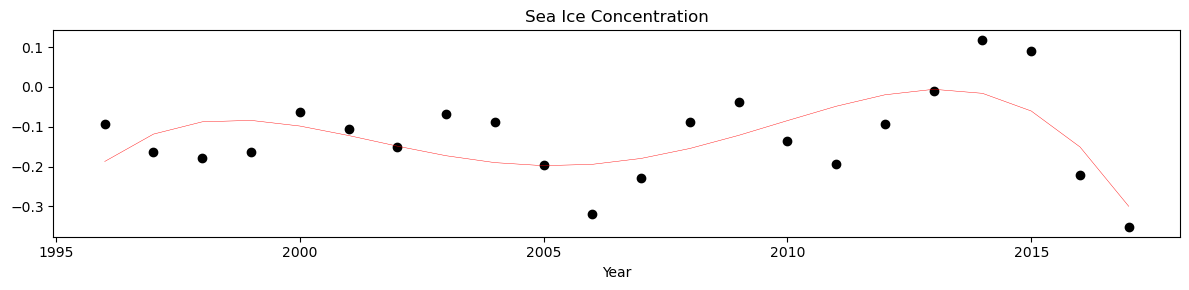

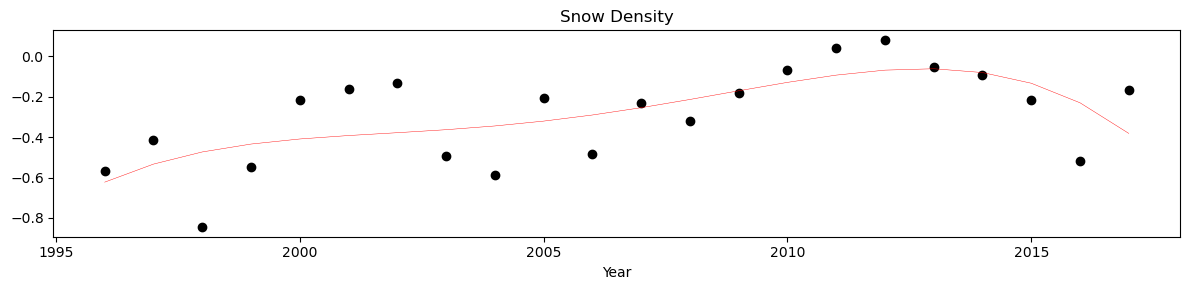

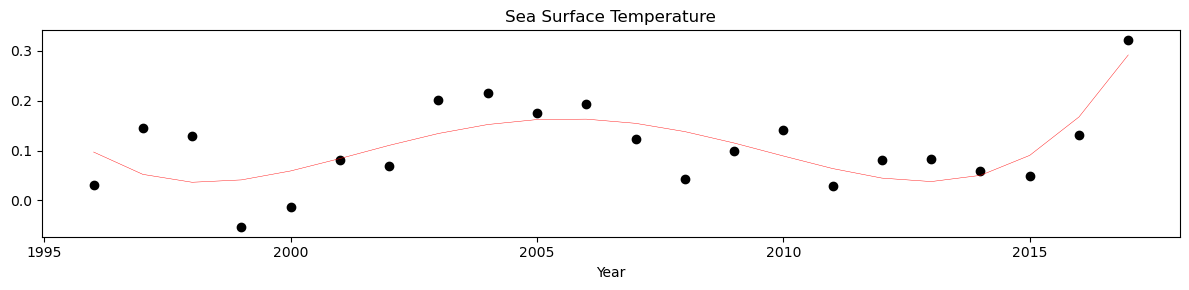

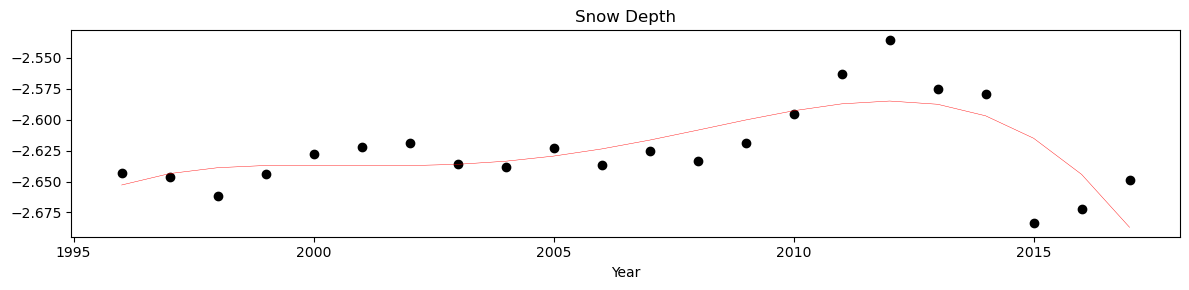

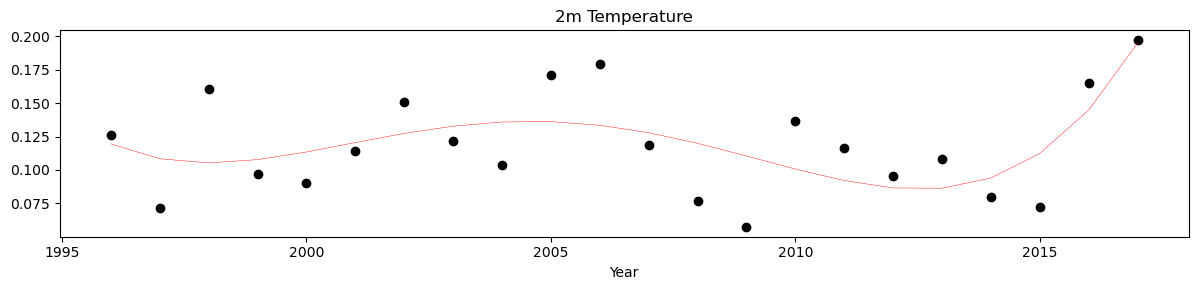

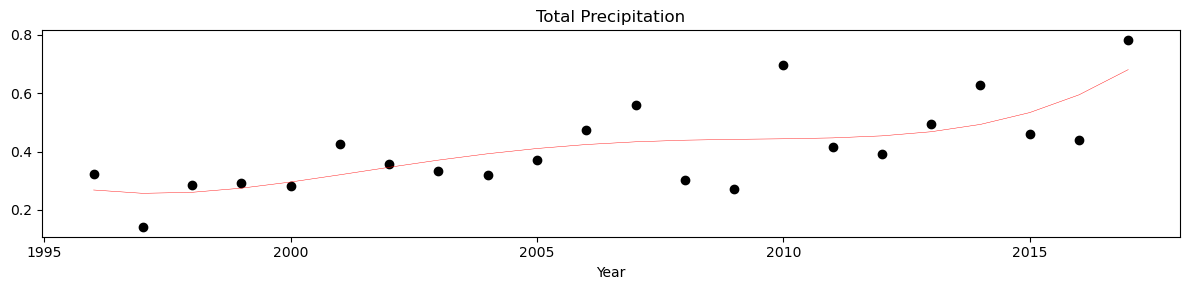

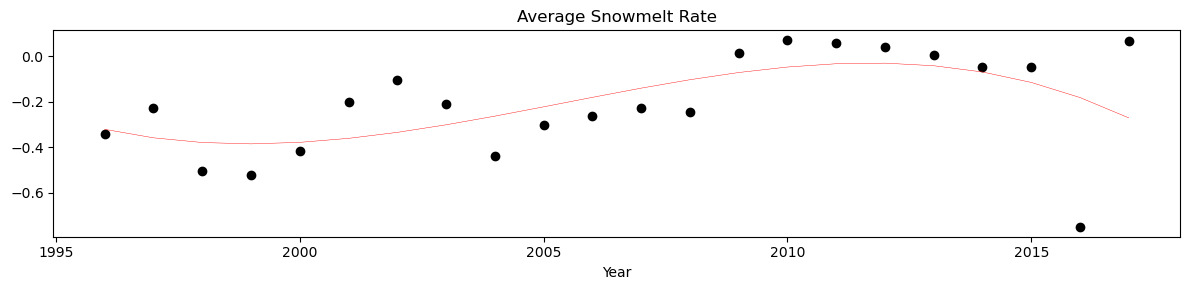

In [48]:
titles = {'siconc': 'Sea Ice Concentration', 'rsn': 'Snow Density', 'sst': 'Sea Surface Temperature', 'sd': 'Snow Depth', 't2m': '2m Temperature', 'tp': 'Total Precipitation', 'avg_smr': 'Average Snowmelt Rate'} 
means = grouped_anomaly.groupby('year').agg('mean').reset_index()
ftmon.plot_yearly(means, columns, titles, 4)

/var/folders/pf/pkxhbds54clgt4d3jrz5l8kw0000gn/T/ipykernel_23782/2001310195.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = grouped_anomaly.groupby('year').agg('std').reset_index()


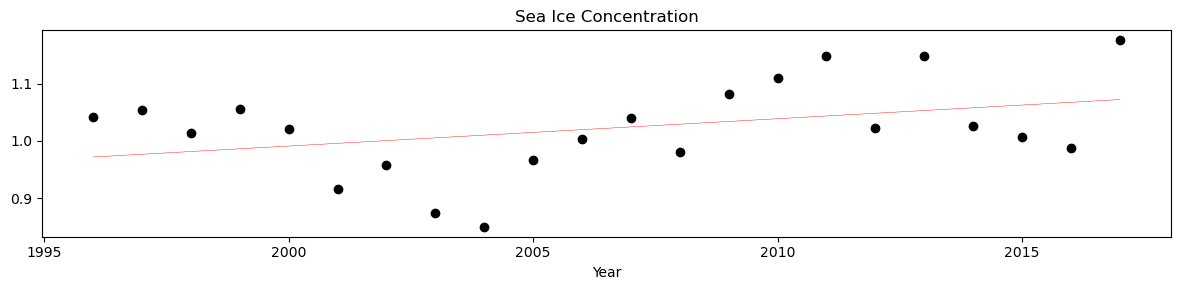

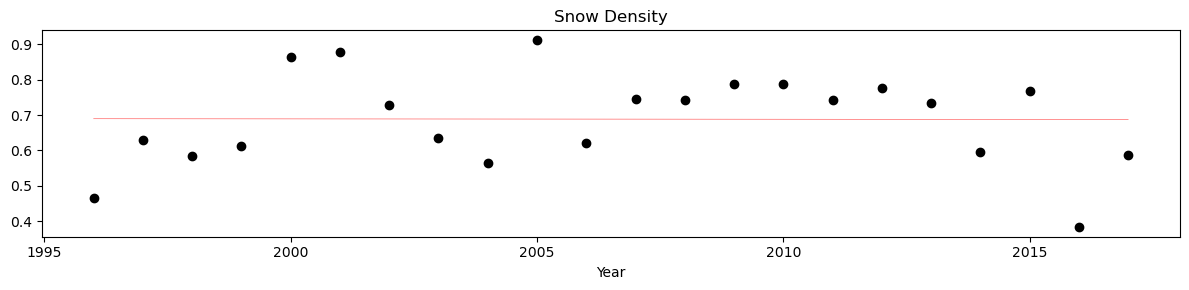

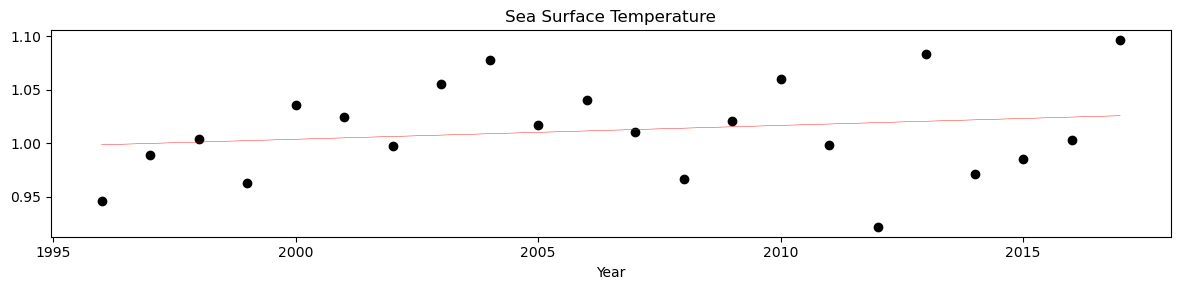

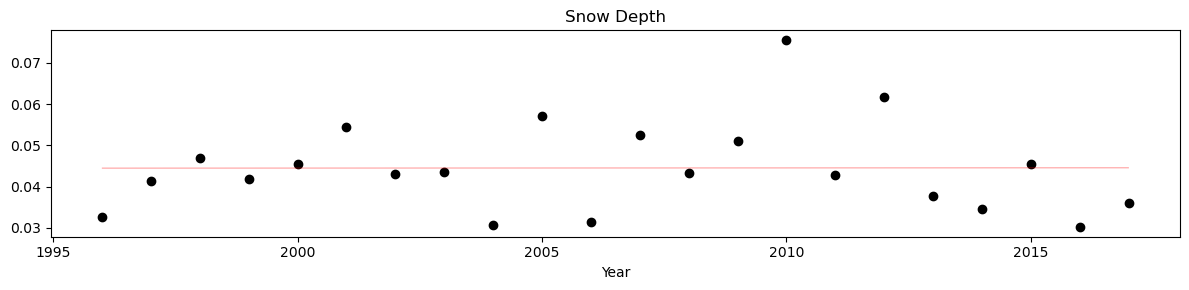

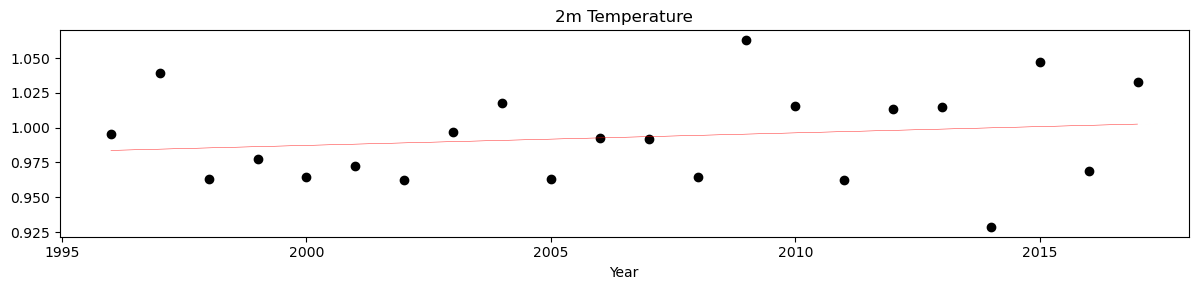

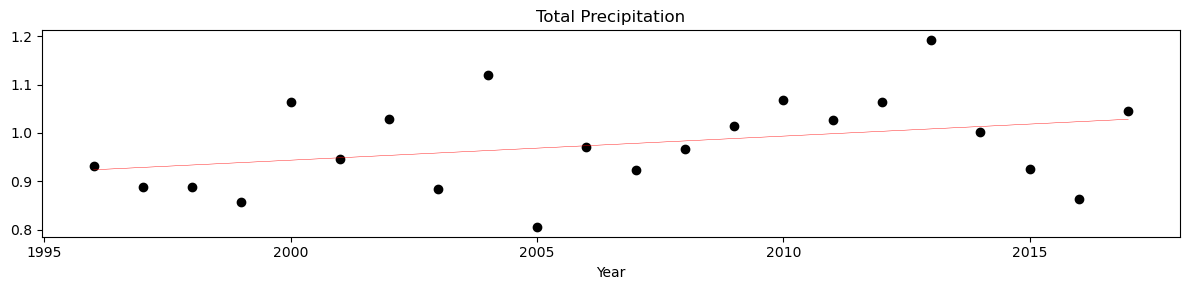

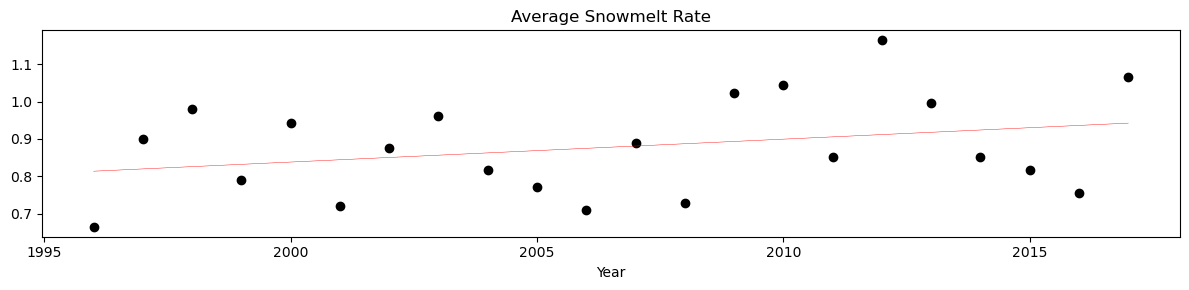

In [16]:
# standard deviations per year
stds = grouped_anomaly.groupby('year').agg('std').reset_index()
ftmon.plot_yearly(stds, columns, titles, 1)

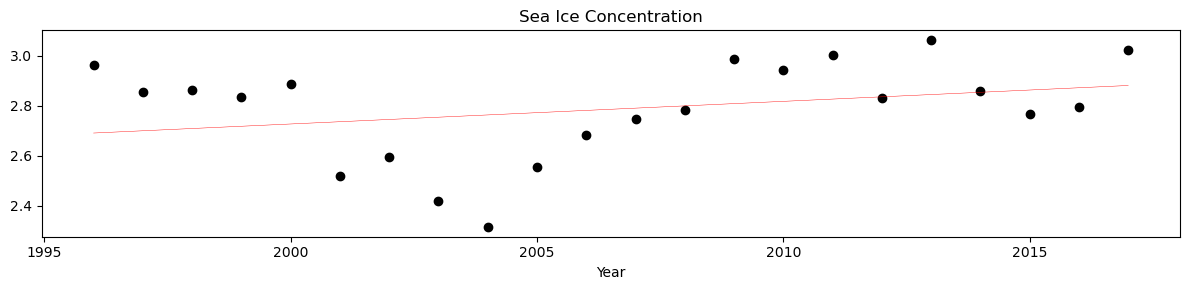

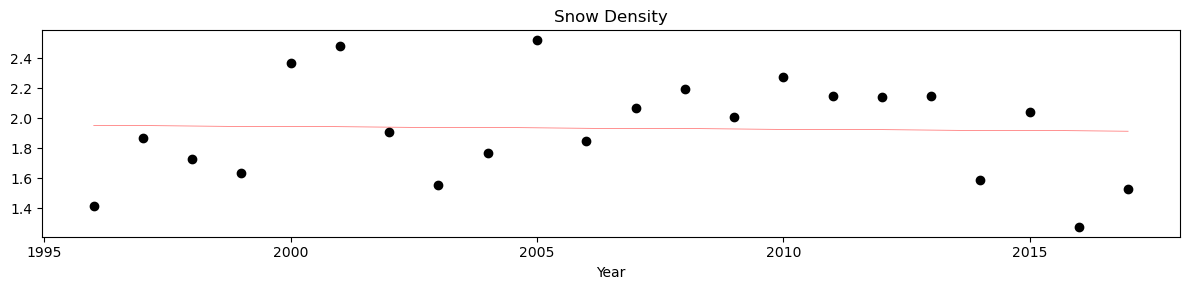

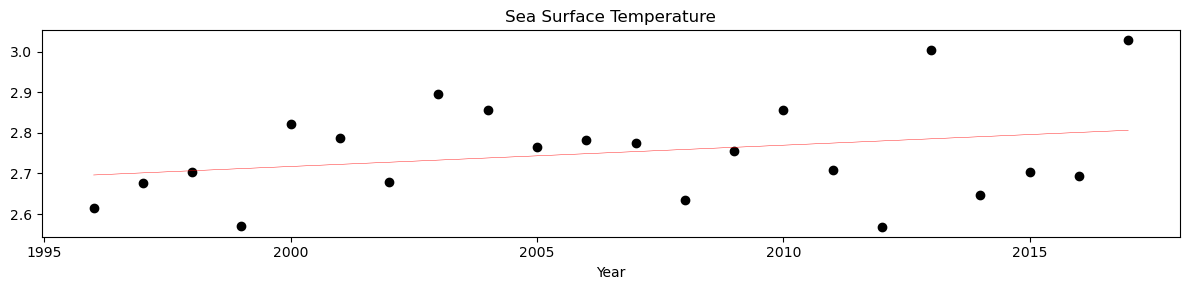

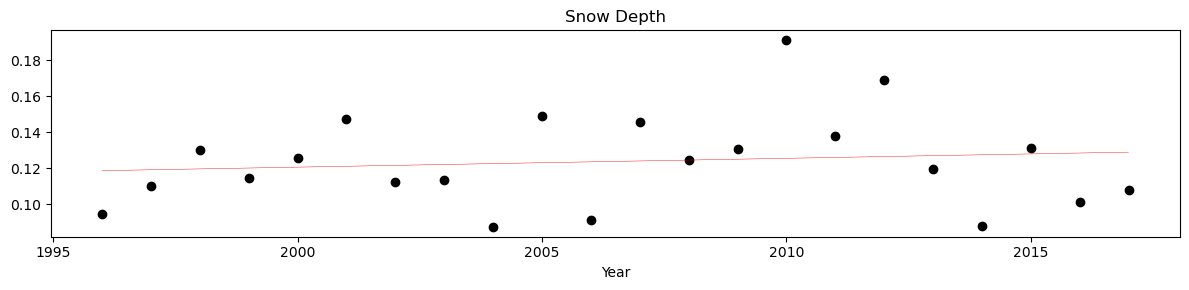

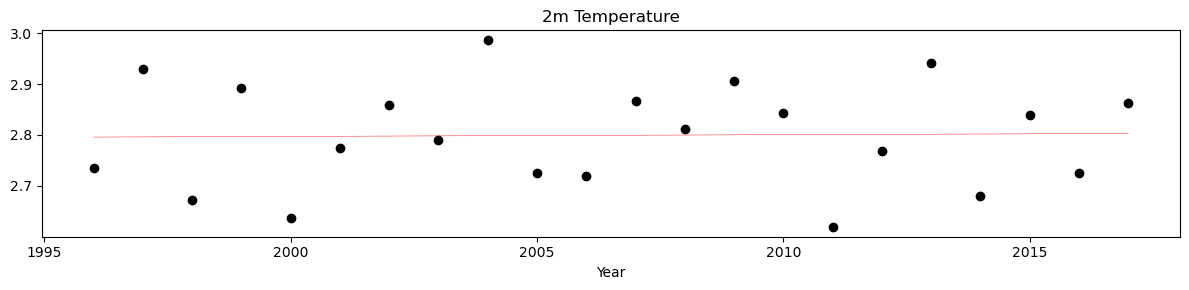

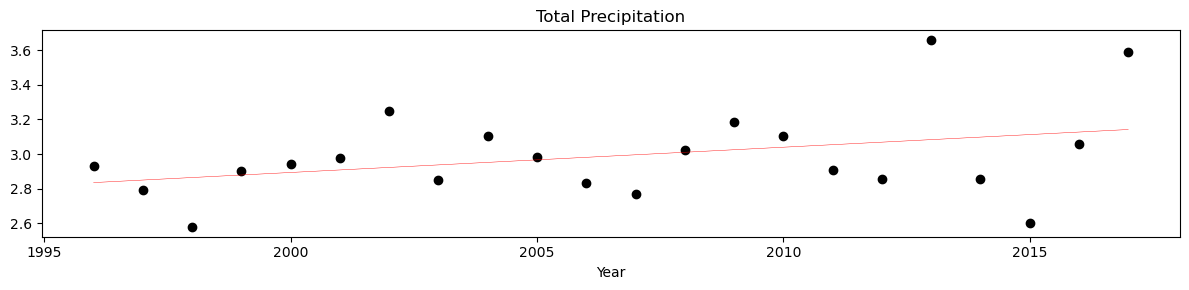

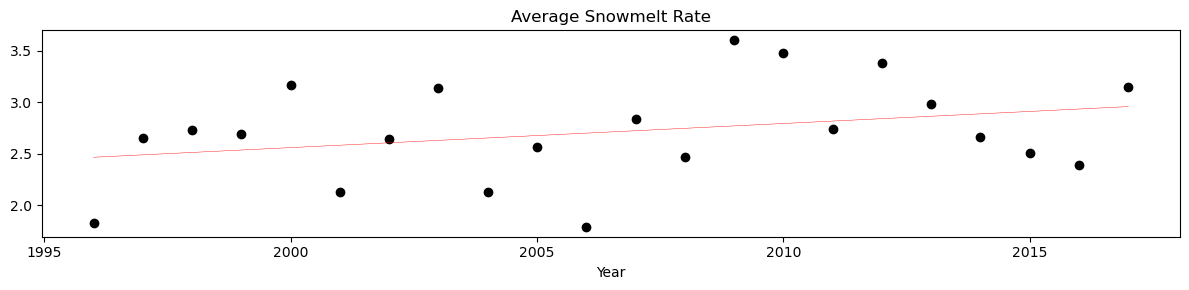

In [17]:
# plot spread per year
mins = grouped_anomaly.groupby('year').agg('min').reset_index()
maxs = grouped_anomaly.groupby('year').agg('max').reset_index()

diff = maxs.copy()
diff[columns] = maxs[columns] - mins[columns]

ftmon.plot_yearly(diff, columns, titles, 1)

/var/folders/pf/pkxhbds54clgt4d3jrz5l8kw0000gn/T/ipykernel_23782/2988842444.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stationary = stationary.groupby('year').agg('mean').reset_index()


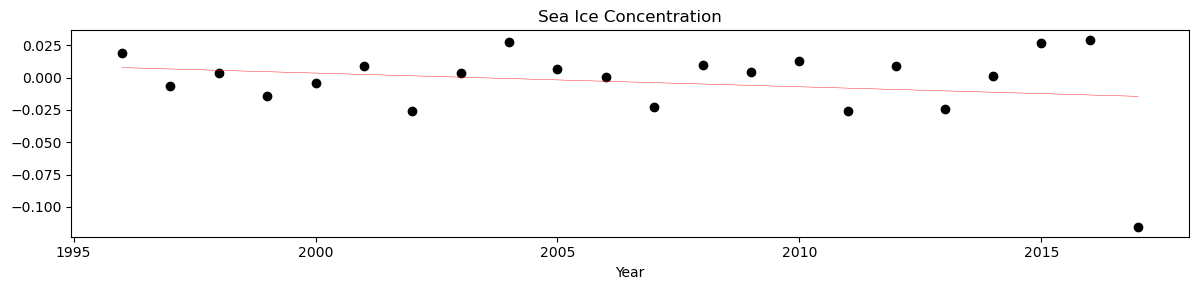

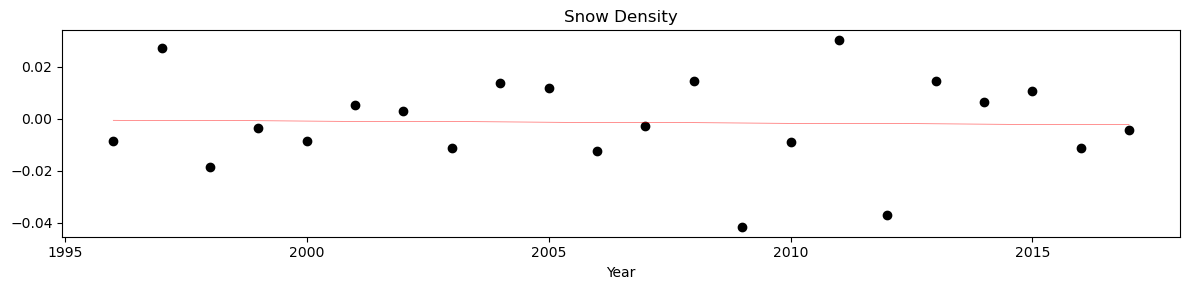

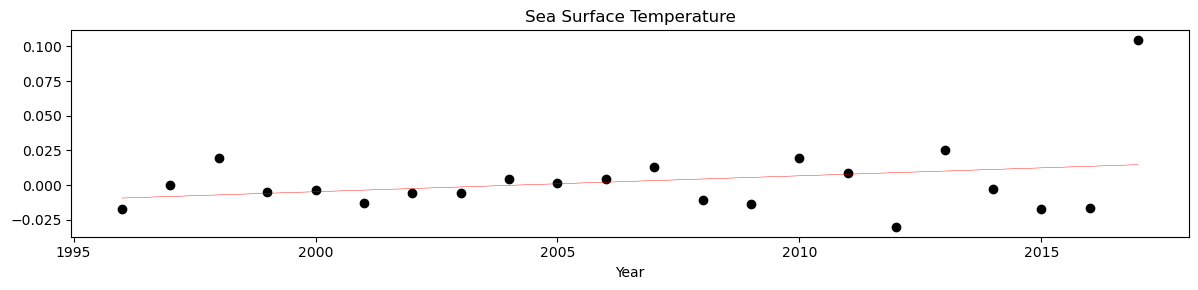

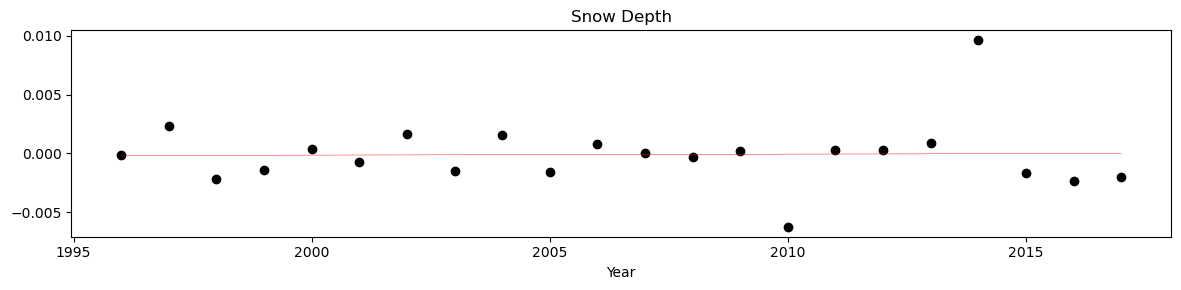

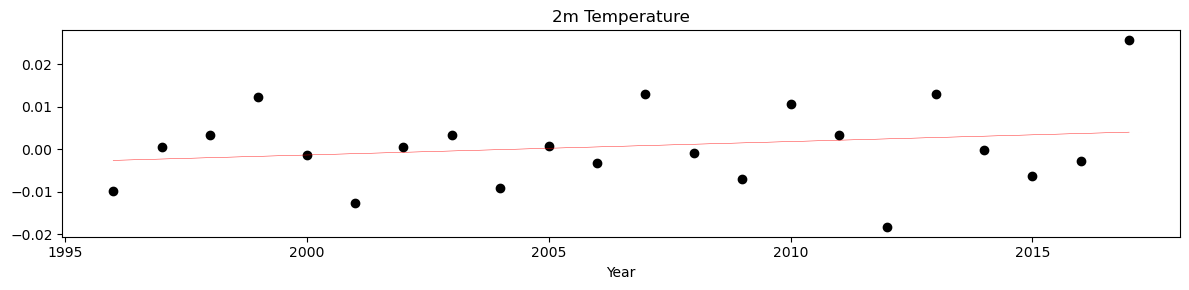

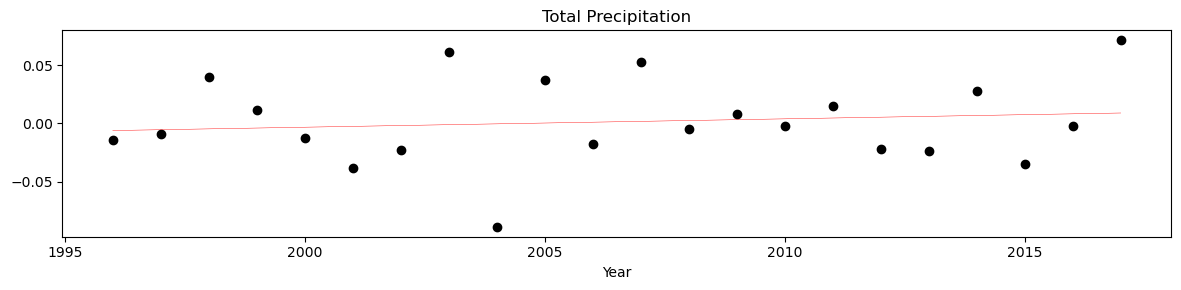

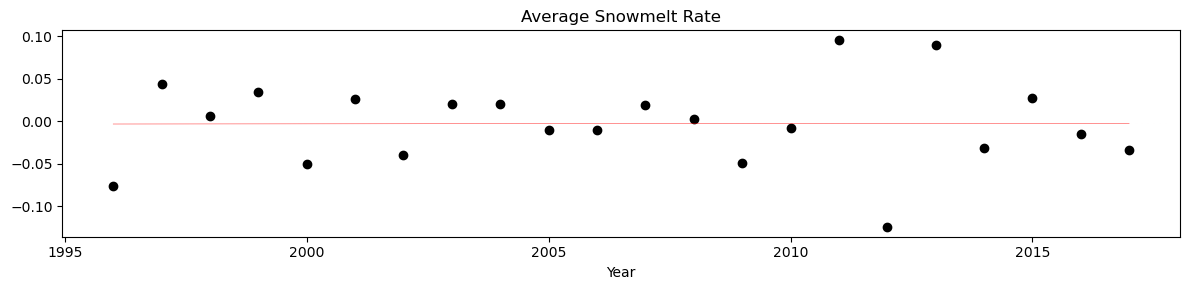

In [18]:
# make it stationary and plot the differences
stationary = grouped_anomaly.copy()
stationary[columns] = stationary[columns]-stationary[columns].shift(-1)

stationary = stationary.groupby('year').agg('mean').reset_index()

ftmon.plot_yearly(stationary, columns, titles, 1)